# Explore here

In [28]:
import pandas as pd

random_seed=315

data_url='https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv'
data_df=pd.read_csv(data_url, sep=';')

In [29]:
from sklearn.model_selection import train_test_split

# First separate the features from the labels
labels=data_df['y']
features=data_df.drop('y', axis=1)

# Do the test-train split
training_features, testing_features, training_labels, testing_labels=train_test_split(
    features,
    labels,
    test_size=0.33, 
    random_state=random_seed
)

In [30]:
training_features.head().transpose()

,22762,5889,20999,24505,9191
age,45,52,56,46,35
job,technician,blue-collar,blue-collar,admin.,unemployed
marital,divorced,married,married,married,married
education,professional.course,basic.4y,basic.4y,high.school,university.degree
default,no,no,no,unknown,no
housing,yes,yes,yes,no,no
loan,no,no,no,no,no
contact,cellular,telephone,cellular,cellular,telephone
month,aug,may,aug,nov,jun
day_of_week,mon,mon,thu,mon,fri


In [31]:
training_features.nunique()

age                 76
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1412
campaign            41
pdays               25
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          310
nr.employed         11
dtype: int64

In [32]:
def feature_composition(df: pd.DataFrame, features: list) -> None:
    '''Takes a dataframe and a list of features. Prints out
    the unique levels of that feature with their count and 
    percent.'''

    for i, column_name in enumerate(features):
        value_counts=df[column_name].value_counts().T.to_dict()

        print(f'\nFeature: {column_name}')

        for key, value in value_counts.items():
            percent_value=(value/len(data_df)) * 100
            print(f' {key}: {value} ({percent_value:.1f}%)')

In [33]:
feature_composition(training_features, ['default','housing','loan','poutcome'])


Feature: default
 no: 21808 (52.9%)
 unknown: 5785 (14.0%)
 yes: 2 (0.0%)

Feature: housing
 yes: 14415 (35.0%)
 no: 12505 (30.4%)
 unknown: 675 (1.6%)

Feature: loan
 no: 22736 (55.2%)
 yes: 4184 (10.2%)
 unknown: 675 (1.6%)

Feature: poutcome
 nonexistent: 23810 (57.8%)
 failure: 2853 (6.9%)
 success: 932 (2.3%)


In [34]:
feature_composition(training_features, ['pdays'])


Feature: pdays
 999: 26567 (64.5%)
 3: 291 (0.7%)
 6: 280 (0.7%)
 4: 83 (0.2%)
 9: 46 (0.1%)
 7: 41 (0.1%)
 2: 40 (0.1%)
 12: 39 (0.1%)
 10: 35 (0.1%)
 5: 33 (0.1%)
 13: 21 (0.1%)
 1: 18 (0.0%)
 11: 18 (0.0%)
 14: 17 (0.0%)
 8: 13 (0.0%)
 15: 12 (0.0%)
 0: 11 (0.0%)
 16: 9 (0.0%)
 17: 8 (0.0%)
 18: 6 (0.0%)
 22: 2 (0.0%)
 19: 2 (0.0%)
 27: 1 (0.0%)
 25: 1 (0.0%)
 26: 1 (0.0%)


In [35]:
column_drops=['poutcome', 'pdays', 'previous']

# Do the drops
training_features.drop(column_drops, axis=1, inplace=True)

# Do the same thing to the testing data
testing_features.drop(column_drops, axis=1, inplace=True)

# Take a look
training_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27595 entries, 22762 to 29283
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             27595 non-null  int64  
 1   job             27595 non-null  object 
 2   marital         27595 non-null  object 
 3   education       27595 non-null  object 
 4   default         27595 non-null  object 
 5   housing         27595 non-null  object 
 6   loan            27595 non-null  object 
 7   contact         27595 non-null  object 
 8   month           27595 non-null  object 
 9   day_of_week     27595 non-null  object 
 10  duration        27595 non-null  int64  
 11  campaign        27595 non-null  int64  
 12  emp.var.rate    27595 non-null  float64
 13  cons.price.idx  27595 non-null  float64
 14  cons.conf.idx   27595 non-null  float64
 15  euribor3m       27595 non-null  float64
 16  nr.employed     27595 non-null  float64
dtypes: float64(5), int64(3), object(

In [36]:
feature_composition(training_features, ['day_of_week'])


Feature: day_of_week
 thu: 5790 (14.1%)
 mon: 5690 (13.8%)
 wed: 5423 (13.2%)
 tue: 5402 (13.1%)
 fri: 5290 (12.8%)


In [37]:
feature_composition(training_features, ['month'])


Feature: month
 may: 9143 (22.2%)
 jul: 4780 (11.6%)
 aug: 4161 (10.1%)
 jun: 3618 (8.8%)
 nov: 2772 (6.7%)
 apr: 1765 (4.3%)
 oct: 474 (1.2%)
 sep: 398 (1.0%)
 mar: 358 (0.9%)
 dec: 126 (0.3%)


In [38]:
import numpy as np

# Don't worry about downcasting FutureWarning
pd.set_option('future.no_silent_downcasting', True)

# Define a helper function here so we can encode the time
# features the same way on the training and testing data
# without copy-pasting the same code
def encode_time_features(data_df: pd.DataFrame) -> pd.DataFrame:
    '''Takes a Pandas dataframe and uses cyclical sin/cos to encode
    month and day features. Returns updated dataframe.'''

    # First convert the features to numeric
    dict={'mon' : 1, 'tue' : 2, 'wed': 3, 'thu' : 4, 'fri': 5}
    data_df=data_df.replace(dict)

    dict={'jan' : 1, 'feb' : 2, 'mar': 3, 'apr' : 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
    data_df=data_df.replace(dict)

    # And fix the dtypes
    data_df['day_of_week']=data_df['day_of_week'].astype(int)
    data_df['month']=data_df['month'].astype(int)

    # Now encode the day and month with sin/cos components
    data_df['day_sin'] = np.sin(2 * np.pi * data_df['day_of_week']/7.0)
    data_df['day_cos'] = np.cos(2 * np.pi * data_df['day_of_week']/7.0)

    data_df['day_sin'] = np.sin(2 * np.pi * data_df['day_of_week']/7.0)
    data_df['day_cos'] = np.cos(2 * np.pi * data_df['day_of_week']/7.0)

    data_df['month_sin'] = np.sin(2 * np.pi * data_df['month']/12.0)
    data_df['month_cos'] = np.cos(2 * np.pi * data_df['month']/12.0)

    # Drop the original string features
    data_df.drop(['month', 'day_of_week'], axis=1, inplace=True)

    return data_df

In [39]:
training_features=encode_time_features(training_features)
testing_features=encode_time_features(testing_features)

In [40]:
feature_composition(training_features, ['education'])


Feature: education
 university.degree: 8097 (19.7%)
 high.school: 6426 (15.6%)
 basic.9y: 4038 (9.8%)
 professional.course: 3465 (8.4%)
 basic.4y: 2834 (6.9%)
 basic.6y: 1568 (3.8%)
 unknown: 1154 (2.8%)
 illiterate: 13 (0.0%)


In [41]:
dict={'unknown': 0, 'illiterate': 1, 'basic.4y': 2, 'basic.6y': 3, 'basic.9y': 4, 'high.school': 5, 'professional.course': 6, 'university.degree': 7}

# Encode the training and testing data
training_features=training_features.replace(dict)
testing_features=testing_features.replace(dict)

# Fix the dtypes
training_features['education']=training_features['education'].astype(int)
testing_features['education']=testing_features['education'].astype(int)

In [42]:
feature_composition(training_features, ['job'])


Feature: job
 admin.: 7002 (17.0%)
 blue-collar: 6225 (15.1%)
 technician: 4463 (10.8%)
 services: 2643 (6.4%)
 management: 1950 (4.7%)
 retired: 1177 (2.9%)
 entrepreneur: 995 (2.4%)
 self-employed: 932 (2.3%)
 housemaid: 708 (1.7%)
 unemployed: 686 (1.7%)
 student: 586 (1.4%)
 0: 228 (0.6%)


In [43]:
encoded_columns=['job','marital','default','housing','loan','contact']

# Do the encoding
training_features=pd.get_dummies(training_features, columns=encoded_columns, dtype=int, drop_first=True)
testing_features=pd.get_dummies(testing_features, columns=encoded_columns, dtype=int, drop_first=True)

training_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27595 entries, 22762 to 29283
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                27595 non-null  int64  
 1   education          27595 non-null  int64  
 2   duration           27595 non-null  int64  
 3   campaign           27595 non-null  int64  
 4   emp.var.rate       27595 non-null  float64
 5   cons.price.idx     27595 non-null  float64
 6   cons.conf.idx      27595 non-null  float64
 7   euribor3m          27595 non-null  float64
 8   nr.employed        27595 non-null  float64
 9   day_sin            27595 non-null  float64
 10  day_cos            27595 non-null  float64
 11  month_sin          27595 non-null  float64
 12  month_cos          27595 non-null  float64
 13  job_admin.         27595 non-null  int64  
 14  job_blue-collar    27595 non-null  int64  
 15  job_entrepreneur   27595 non-null  int64  
 16  job_housemaid      2759

In [44]:
training_features.head()

,age,education,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,day_sin,...,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_telephone
22762,45,6,112,2,1.4,93.444,-36.1,4.965,5228.1,0.781831,...,1,0,0,1,0,0,1,1,0,0
5889,52,2,253,2,1.1,93.994,-36.4,4.857,5191.0,0.781831,...,0,1,0,1,0,0,1,1,0,1
20999,56,2,366,1,1.4,93.444,-36.1,4.964,5228.1,-0.433884,...,0,1,0,1,0,0,1,1,0,0
24505,46,5,76,3,-0.1,93.200,-42.0,4.191,5195.8,0.781831,...,0,1,0,0,0,1,0,1,0,0
9191,35,7,360,2,1.4,94.465,-41.8,4.967,5228.1,-0.974928,...,0,1,0,1,0,1,0,1,0,1


In [45]:
from sklearn.preprocessing import StandardScaler

# Scale the features
standard_scaler=StandardScaler().fit(training_features)
training_features=standard_scaler.transform(training_features)
testing_features=standard_scaler.transform(testing_features)

print(f'Training features are: {type(training_features)}')
print(f'Training features shape: {training_features.shape}')

Training features are: <class 'numpy.ndarray'>
Training features shape: (27595, 34)


In [46]:
from sklearn.preprocessing import LabelEncoder

# Last, encode the labels
label_encoder=LabelEncoder().fit(training_labels)
training_labels=label_encoder.transform(training_labels)
testing_labels=label_encoder.transform(testing_labels)

print(f'Training labels: {training_labels}')

Training labels: [0 0 0 ... 0 0 0]


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train the model on the training data
base_model=LogisticRegression(random_state=random_seed)
base_model.fit(training_features, training_labels)

# Make predictions
base_training_predictions=base_model.predict(training_features)

# Score for accuracy
percent_accuracy=accuracy_score(training_labels, base_training_predictions) * 100
print(f'Model is {percent_accuracy:.1f}% accurate on the training data.')

Model is 90.8% accurate on the training data.


In [48]:
print(f'Data is {float(1 - (sum(training_labels) / len(training_labels))) * 100:.1f}% "no"')

Data is 88.9% "no"


In [49]:
weighted_model=LogisticRegression(random_state=random_seed, class_weight='balanced')
weighted_model.fit(training_features, training_labels)

# Make predictions
weighted_training_predictions=weighted_model.predict(training_features)

# Score for accuracy
percent_accuracy=accuracy_score(training_labels, weighted_training_predictions) * 100
print(f'Model is {percent_accuracy:.1f}% accurate on the training data.')

Model is 85.1% accurate on the training data.


In [50]:
import importlib
import utils
importlib.reload(utils)


<module 'utils' from '/workspaces/team/src/utils.py'>

In [59]:
def calculate_cashflow():
    return "Cashflow calculated"


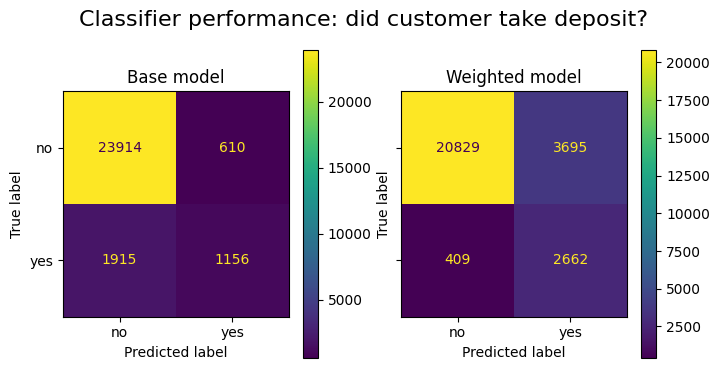

Model base model is 90.8% accurate on the training data.
Model weighted model is 85.1% accurate on the weighted data.


In [62]:
from sklearn.metrics import ConfusionMatrixDisplay

# Set-up two subplots for the training and testing confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True)

# Set the figure and individual plot titles
fig.suptitle('Classifier performance: did customer take deposit?', fontsize=16)
axes[0].set_title('Base model')
axes[1].set_title('Weighted model')

# Plot the training data performance
_=ConfusionMatrixDisplay.from_estimator(
    estimator=base_model,
    X=training_features,
    y=training_labels,
    display_labels=label_encoder.classes_,
    #normalize='all',
    ax=axes[0]
)

# Plot the testing data performance
_=ConfusionMatrixDisplay.from_estimator(
    estimator=weighted_model,
    X=training_features,
    y=training_labels,
    display_labels=label_encoder.classes_,
    #normalize='all',
    ax=axes[1]
)

plt.show()

base_training_predictions=base_model.predict(training_features)
percent_accuracy=accuracy_score(training_labels, base_training_predictions) * 100
print(f'Model base model is {percent_accuracy:.1f}% accurate on the training data.')

weighted_training_predictions=weighted_model.predict(training_features)
percent_accuracy=accuracy_score(training_labels, weighted_training_predictions) * 100
print(f'Model weighted model is {percent_accuracy:.1f}% accurate on the weighted data.')

In [63]:
from sklearn.metrics import matthews_corrcoef

base_mcc=matthews_corrcoef(training_labels, base_training_predictions)
weighted_mcc=matthews_corrcoef(training_labels, weighted_training_predictions)

print(f'Base model Mathews correlation: {base_mcc:.3f}')
print(f'Weighted Mathews correlation: {weighted_mcc:.3f}')

Base model Mathews correlation: 0.452
Weighted Mathews correlation: 0.535
